# Einführung in Lindenmayer-Systeme

Von Jürgen Brauer

Ein gutes Einführungsvideo in die Welt der Lindenmayer-Systeme ist:

[8.5: L-Systems - The Nature of Code](https://www.youtube.com/watch?v=f6ra024-ASY)

Nach 20 Minuten hat man hier eine gute Intuition, wie

- L-Systeme funktionieren
- wozu sie gut sind
- wie man sie implementieren kann

# Kurzer Exkurs: Stack-ähnliche Datenstrukturen in Python

In [57]:
from collections import deque

stack = deque()

In [58]:
stack

deque([])

In [59]:
stack.append(1)

In [60]:
stack

deque([1])

In [61]:
stack.append(2)

In [62]:
stack

deque([1, 2])

In [63]:
stack.append(3)

In [64]:
stack

deque([1, 2, 3])

In [66]:
stack.pop()

3

In [67]:
stack

deque([1, 2])

In [68]:
stack.pop()

2

In [69]:
stack

deque([1])

In [71]:
stack.pop()

1

In [72]:
stack

deque([])

# Turtle-Grafik

Damit wir später unsere generierten Strings visualisieren können, brauchen wir eine Zeichenmöglichkeit:

    Befehl | Bedeutung
    ------ | --------------------------
    F      | vorwärts fahren um Länge s und dabei Linie zeichnen
    L      | links drehen um Winkel w
    R      | rechts drehen um Wnkel w
    [      | Orientierung und Position der Turtle auf Stack legen
    ]      | Orientierung und Position der Turtle von Stack wiederherstellen


In [111]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

LINE_COLOR = (255,255,255)
LINE_WIDTH = 2

class turtle_graphics:
    
    def __init__(self, image_width, image_height):
        self.image_width = image_width
        self.image_height = image_height        
        self.image = np.zeros(shape=(image_height, image_width, 3), dtype=np.uint8)                       
        
        self.pos    = [image_width//2, image_height//2]
        self.orient = -np.pi/2
        
        self.pose_stack = deque()
        
    
    def move(self, length):
        
        old_pos = self.pos.copy()
        
        dx = (int) (np.cos(self.orient) * length)
        dy = (int) (np.sin(self.orient) * length)
        
        self.pos[0] += dx
        self.pos[1] += dy

        cv.line(img=self.image,
                pt1=(old_pos[0], old_pos[1]),
                pt2=(self.pos[0], self.pos[1]),
                color=(255,255,255),
                thickness=LINE_WIDTH)
        
        

    def turn(self, angle_degree):
        
        angle_radians = (angle_degree/360) * (2.0*np.pi)        
        self.orient += angle_radians
        

        
    def push_pose(self):
        pose = (self.pos.copy(), self.orient)
        self.pose_stack.append( pose )
        
        
    def pop_pose(self):        
        pose = self.pose_stack.pop()
        self.pos = pose[0]
        self.orient = pose[1]
        
        

In [114]:
t = turtle_graphics(100,100)

t.move(10)
t.turn(-90)

t.push_pose()

t.move(10)
t.turn(90)
t.move(10)

t.pop_pose()

t.turn(180)
t.move(10)
t.turn(-90)
t.move(10)

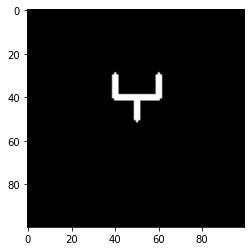

In [115]:
plt.imshow(t.image)
plt.show()

# Lindenmayer-System

generation #0: F


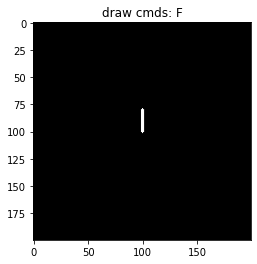

generation #1: F+FF


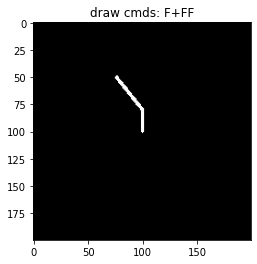

generation #2: F+FF+F+FFF+FF


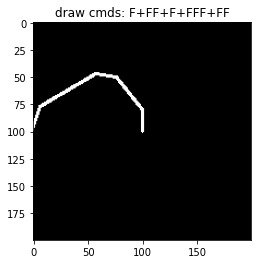

generation #3: F+FF+F+FFF+FF+F+FF+F+FFF+FFF+FF+F+FFF+FF


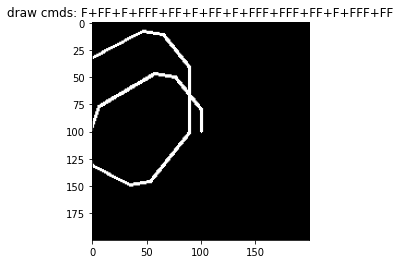

generation #4: F+FF+F+FFF+FF+F+FF+F+FFF+FFF+FF+F+FFF+FF+F+FF+F+FFF+FF+F+FF+F+FFF+FFF+FF+F+FFF+FFF+FF+F+FFF+FF+F+FF+F+FFF+FFF+FF+F+FFF+FF


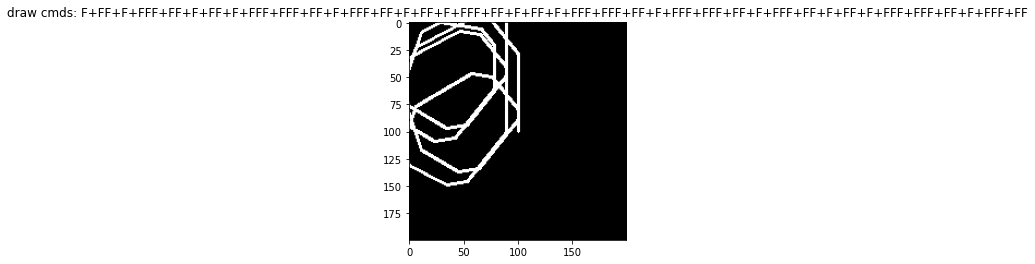

In [133]:
P1 = { "F" : "F+F" }
L1 = ( "F", P1 )

P2 = { "F" : "F+FF" }
L2 = ( "F", P2 )

L = L2

def substitute(txt, P):
    
    new_txt = ""    
    for c in txt:
        
        # is there a rule for character c
        # in the set of production rules P?
        if c in P:
            # yes!
            replace_txt = P[c]
            new_txt += replace_txt
        else:
            # no! so just copy c to new text
            new_txt += c
            
    return new_txt



def txt_to_graphics(txt):
    
    t = turtle_graphics(200,200)
    
    length = 20
    angle  = 40
    
    for c in txt:
        if c=="F":
            t.move(length)
        elif c=="+":
            t.turn(-angle)
        elif c=="-":
            t.turn(+angle)
        elif c=="[":
            t.push_pose()
        elif c=="]":
            t.pop_pose()
     
    plt.imshow(t.image)
    plt.title(f"draw cmds: {txt}")
    plt.show()
    


txt = L[0]
P = L[1]
NR_GENS = 5
for gen_nr in range(0, NR_GENS):
    
    print(f"generation #{gen_nr}: {txt}")
    txt_to_graphics( txt )
    
    txt = substitute( txt, P )